<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2014-1</h1>



<h1 align="center">Programación para la física computacional</h1> 

## Práctica 3.  Programación para la física computacional


### Gráficas y errores numéricos
---

## EJERCICIOS:

### 1. Gráfica de datos experimentales

El archivo `manchasolares.txt`, contiene el número observado de manchas solares en el Sol en cada mes desde enero de 1749. El archivo contiene dos columnas de números, la primera es el mes y la segunda el número de manchas solares.

**(a)** Escribe un programa que lea los datos y haga una gráfica de las manchas solares en función del tiempo.

In [33]:
import matplotlib.pyplot as plt
import numpy as np
#Me debo acostumbrar a esto, porque si luego hay cosas que se llaman iguales, se confunde.

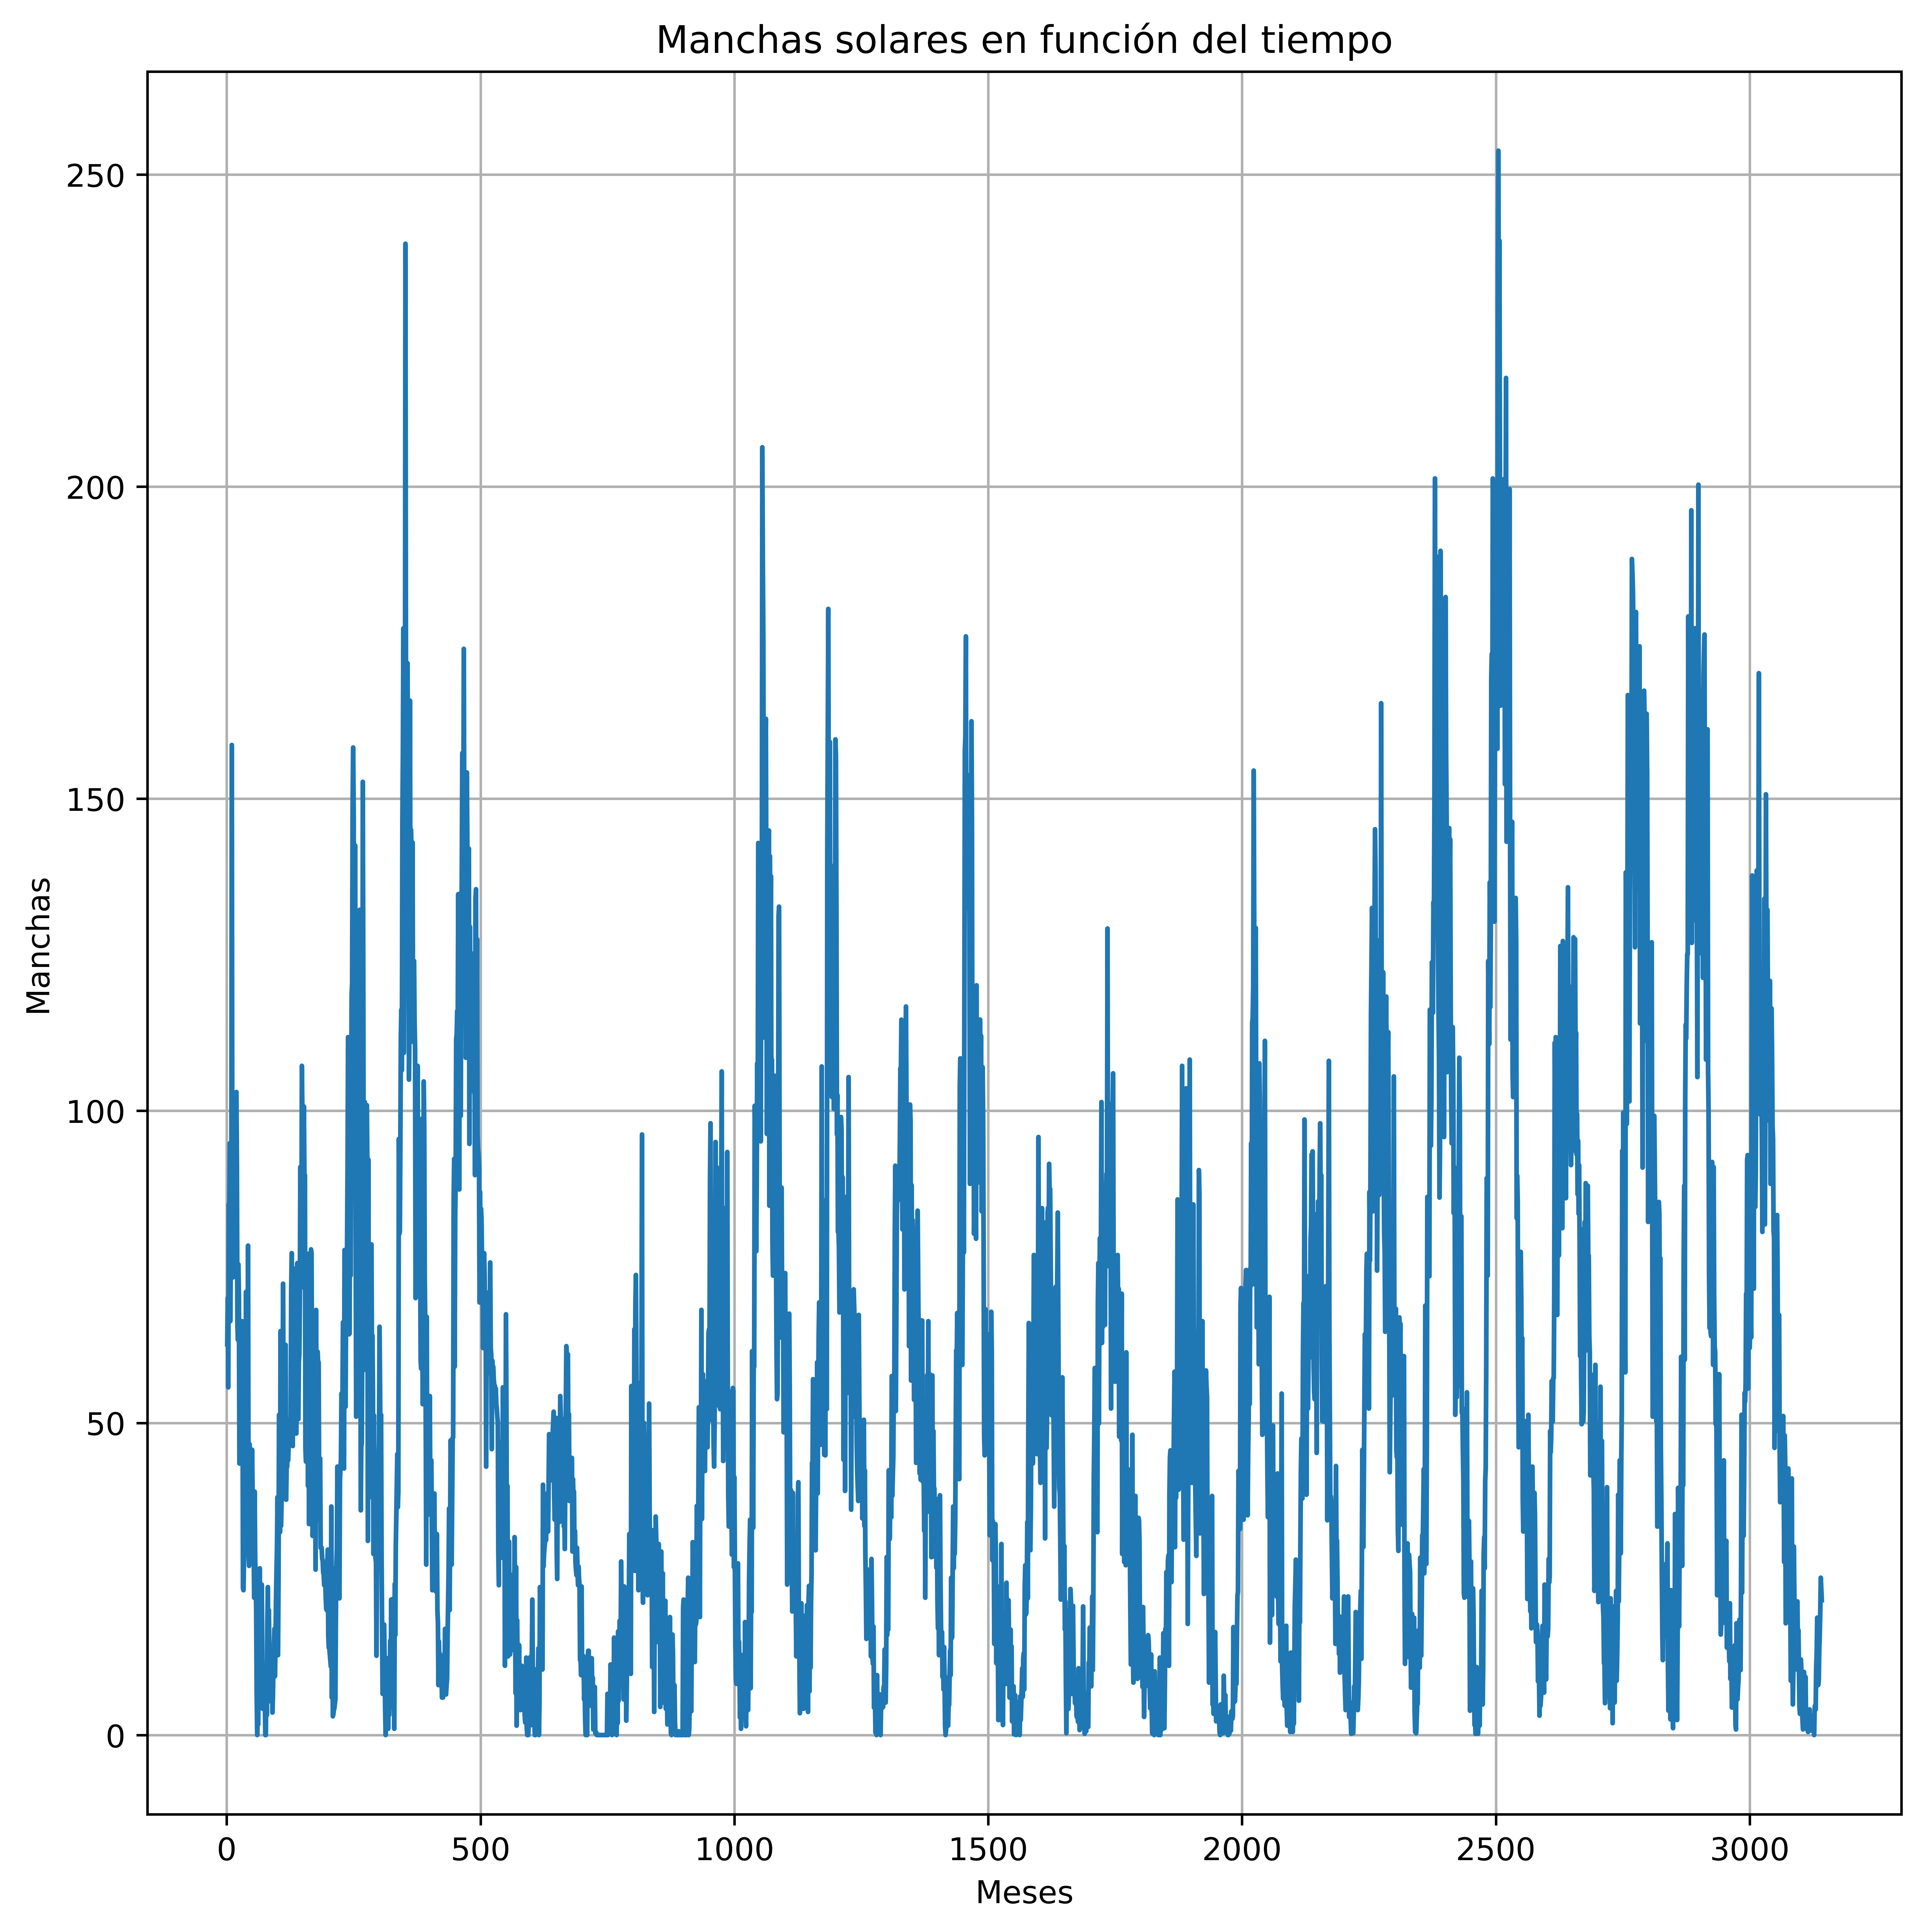

In [34]:
#Cuando estemos en duda preguntamos a Google
file = open('manchasolares.txt', 'r')
#Lo que hacemos es abrir el archivo y ponerlo en read mode.
#Lit es una analogia a la vida real, tomas un libro, lo abres, lo lees y despues tu decides que hacer con el
#escribilre (modificarlo, varias cosas), y despues de abrir el libro tienes que cerrarlo.

line = file.readline()
# Aquí la instruccion se la asignamos a la variable line, es decir, va a leer las lineas del archivo

#Nosotros sabemos que las lineas son del tipo  # #, donde gato son cualquier número, y son separados por el
#caracter \t (un doble espacio quiero creer yo), eso es lo que me sugirio el copilot (no es como que yo supiera que era ese)
#*cries in regex*
Meses = []
Manchas = []
#Lo tipico, debo crear unas listas vacias, para que pueda distinguir el tipo de datos que voy guardando
for line in file:
    items = line.split('\t')
    Meses.append(float(items[0]))
    Manchas.append(float(items[1]))
file.close()
figure(figsize=(10, 10), dpi=800)
#No me acordaba de esto, pero es para hacer la figura más grande
plt.plot(Meses, Manchas)
plt.grid(True)
plt.xlabel('Meses')
plt.ylabel('Manchas')
plt.title('Manchas solares en función del tiempo')
plt.show()

**(b)** Modifica tu programa para mostrar solo los primeros 1000 datos (experimentales) en la gráfica.

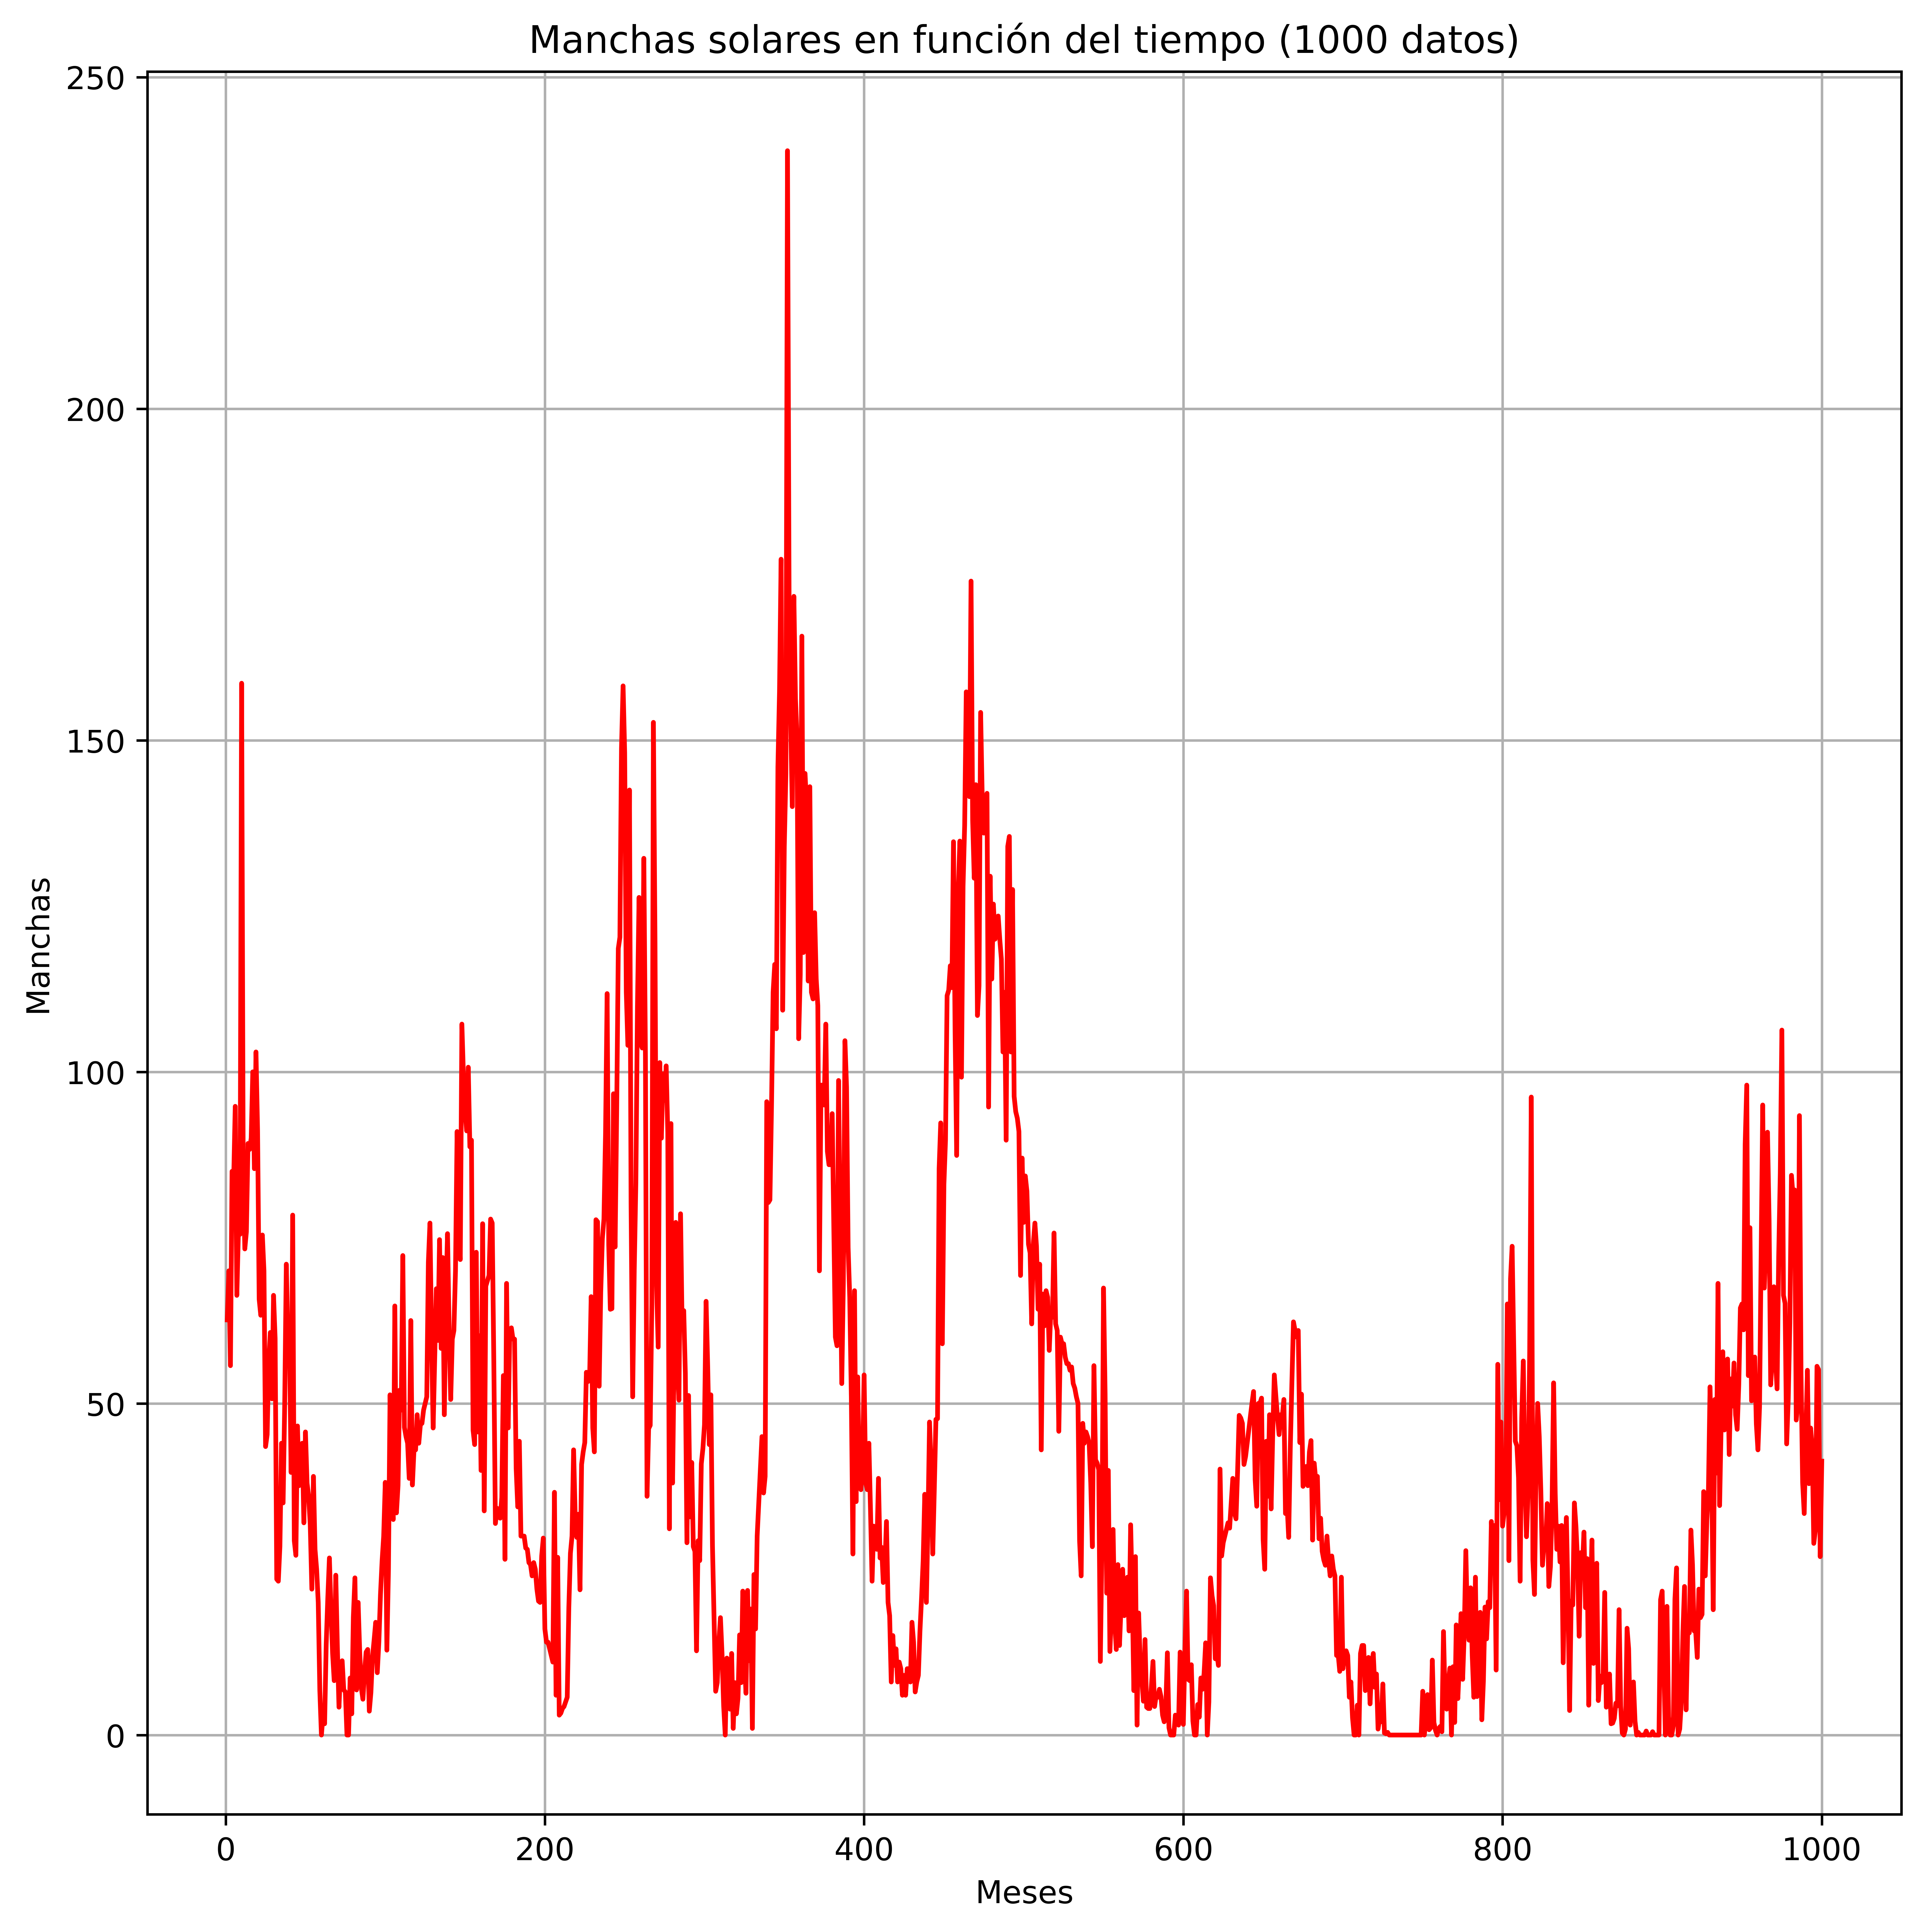

In [35]:
file = open('manchasolares.txt', 'r')
line = file.readline()
Meses = []
Manchas = []
for line in file:
    items = line.split('\t')
    Meses.append(float(items[0]))
    Manchas.append(float(items[1]))
file.close()

figure(figsize=(10, 10), dpi=800)
plt.plot(Meses[:1000], Manchas[:1000],color = 'red') #lit, solo fue ponerle tope a que datos deberia considerar
plt.grid(True)
plt.xlabel('Meses')
plt.ylabel('Manchas')
plt.title('Manchas solares en función del tiempo (1000 datos)')
plt.show()

**c)** Modifica nuevamente tu programa para calcular y graficar la media (promedio) móvil de los datos, definida por:

$$Y_k = {1\over2r} \sum_{m=-r}^r y_{k+m}$$

donde $r = 5$ (en este caso) y $y_k$ son los números de manchas solares.

El programa debe graficar tanto los datos originales como la media móvil en el mismo gráfico, sólo sobre los primeros 1000 datos.


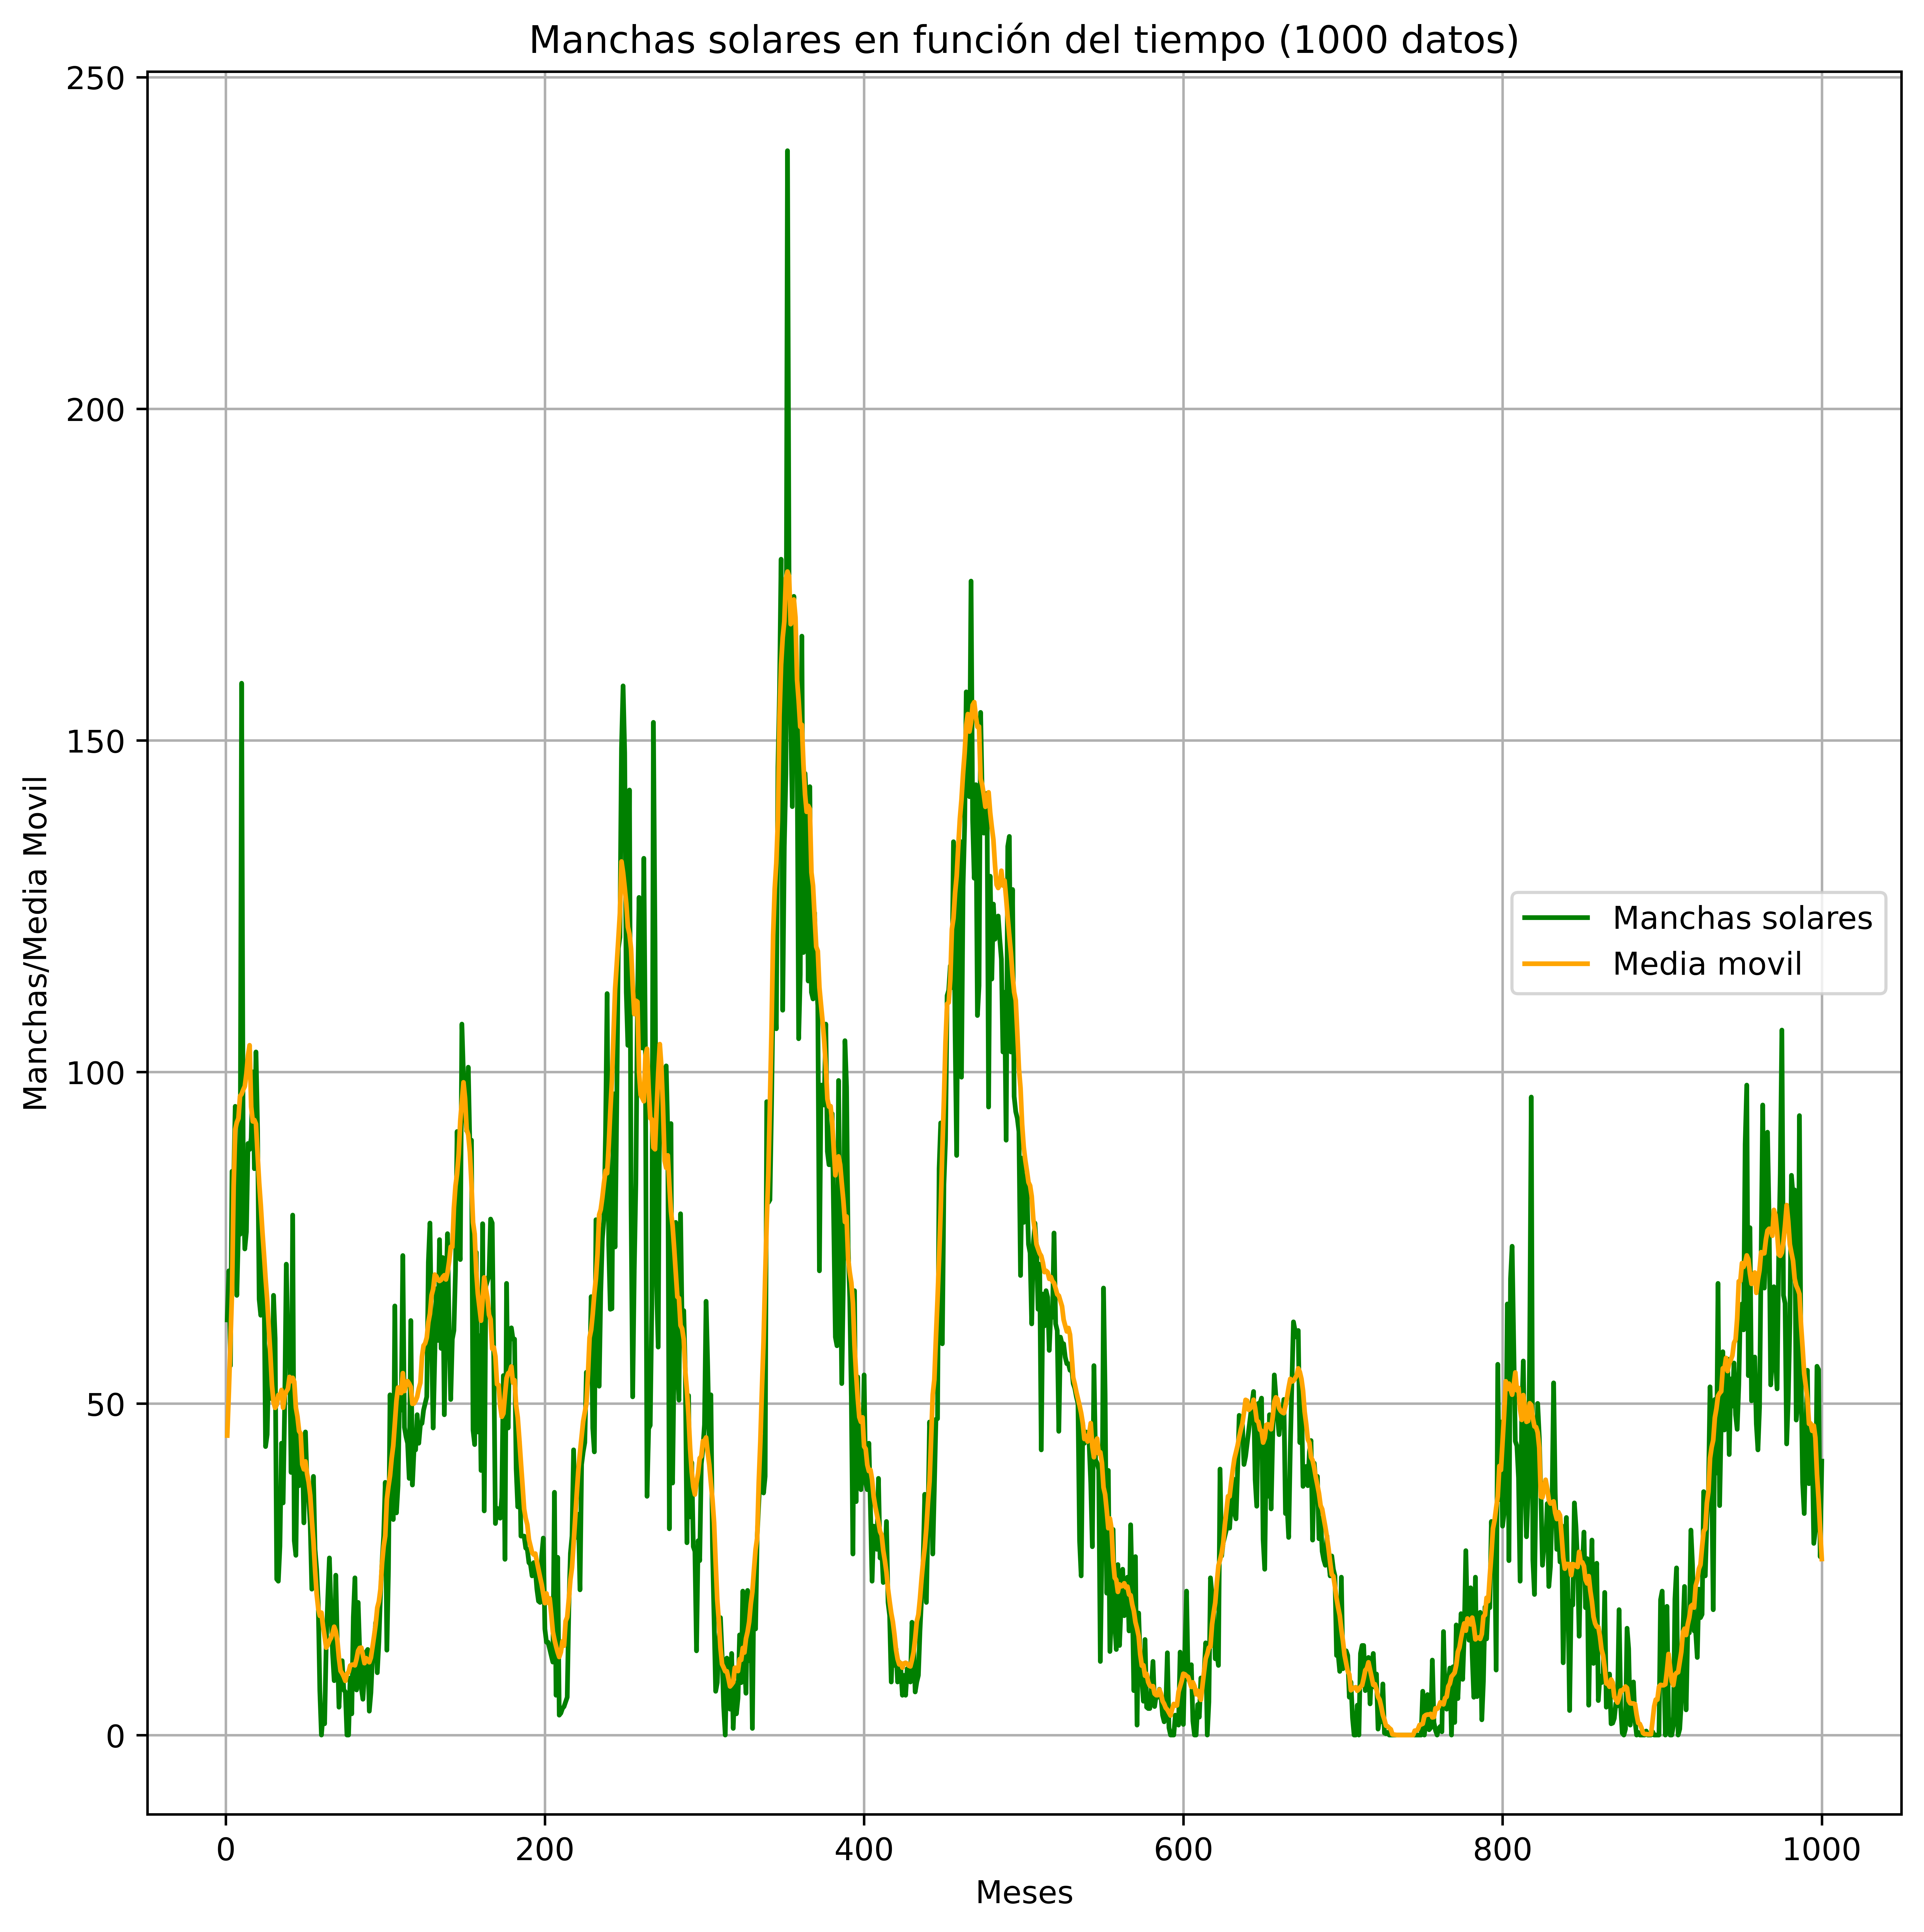

In [36]:
file = open('manchasolares.txt', 'r')
line = file.readline()
Meses = []
Manchas = []
for line in file:
    items = line.split('\t')
    Meses.append(float(items[0]))
    Manchas.append(float(items[1]))
file.close()
#Okay, mantenemos esta parte intacta, lo unico que hace es darnos los datos.


#Definimos nuevas cosas
r = 5
MediaMovil = []
for k in range(0,1000):
#1000 datos asi es
    Suma = 0
    for m in range(-r,r+1):
        if k+m >= 0 and k+m <= 1000:
        #ocupamos una condicion, pues al solo trabajar con 1000 datos,
        #no tenemos acceso a el dato -5,-4-3 y asi, o el 1001, 1002, 1003,...
            Suma = Suma + Manchas[k+m]
    MediaMovil.append(Suma/(2*r)) #podriamos poner solo 1/10, pero asi es mas general
    #al terminar el for para m, pues tenemos nuestro Y_k
            
#Ploteamos asi es


figure(figsize=(10, 10), dpi=800)
plt.plot(Meses[:1000], Manchas[:1000],'green',label = 'Manchas solares')
plt.plot(Meses[:1000], MediaMovil[:1000],color = 'orange',label = 'Media movil')
plt.grid(True)
plt.xlabel('Meses')
plt.ylabel('Manchas/Media Movil')
plt.title('Manchas solares en función del tiempo (1000 datos)')
plt.legend(loc="center right")
plt.show()

### 2. Gráfica de curvas

Aunque la función `plot` está diseñada principalmente para hacer gráficos $xy$ estándar, se puede adaptar para otros tipos de gráficas también.

**a)** Grafica la llamada curva _deltoide_, definida paramétricamente por las ecuaciones:

$$x = 2 cos θ + cos 2θ, \; \; \; \; \; \; y = 2 sin θ − sin 2θ$$

donde $0\le\theta<2\pi$. Toma un conjunto de valores para $\theta$ entre $0$ y $2\pi$ y calcula $x(\theta)$ e $y(\theta)$ usando las ecuaciones anteriores, para posteriormente graficar $y$ como función de $x$.



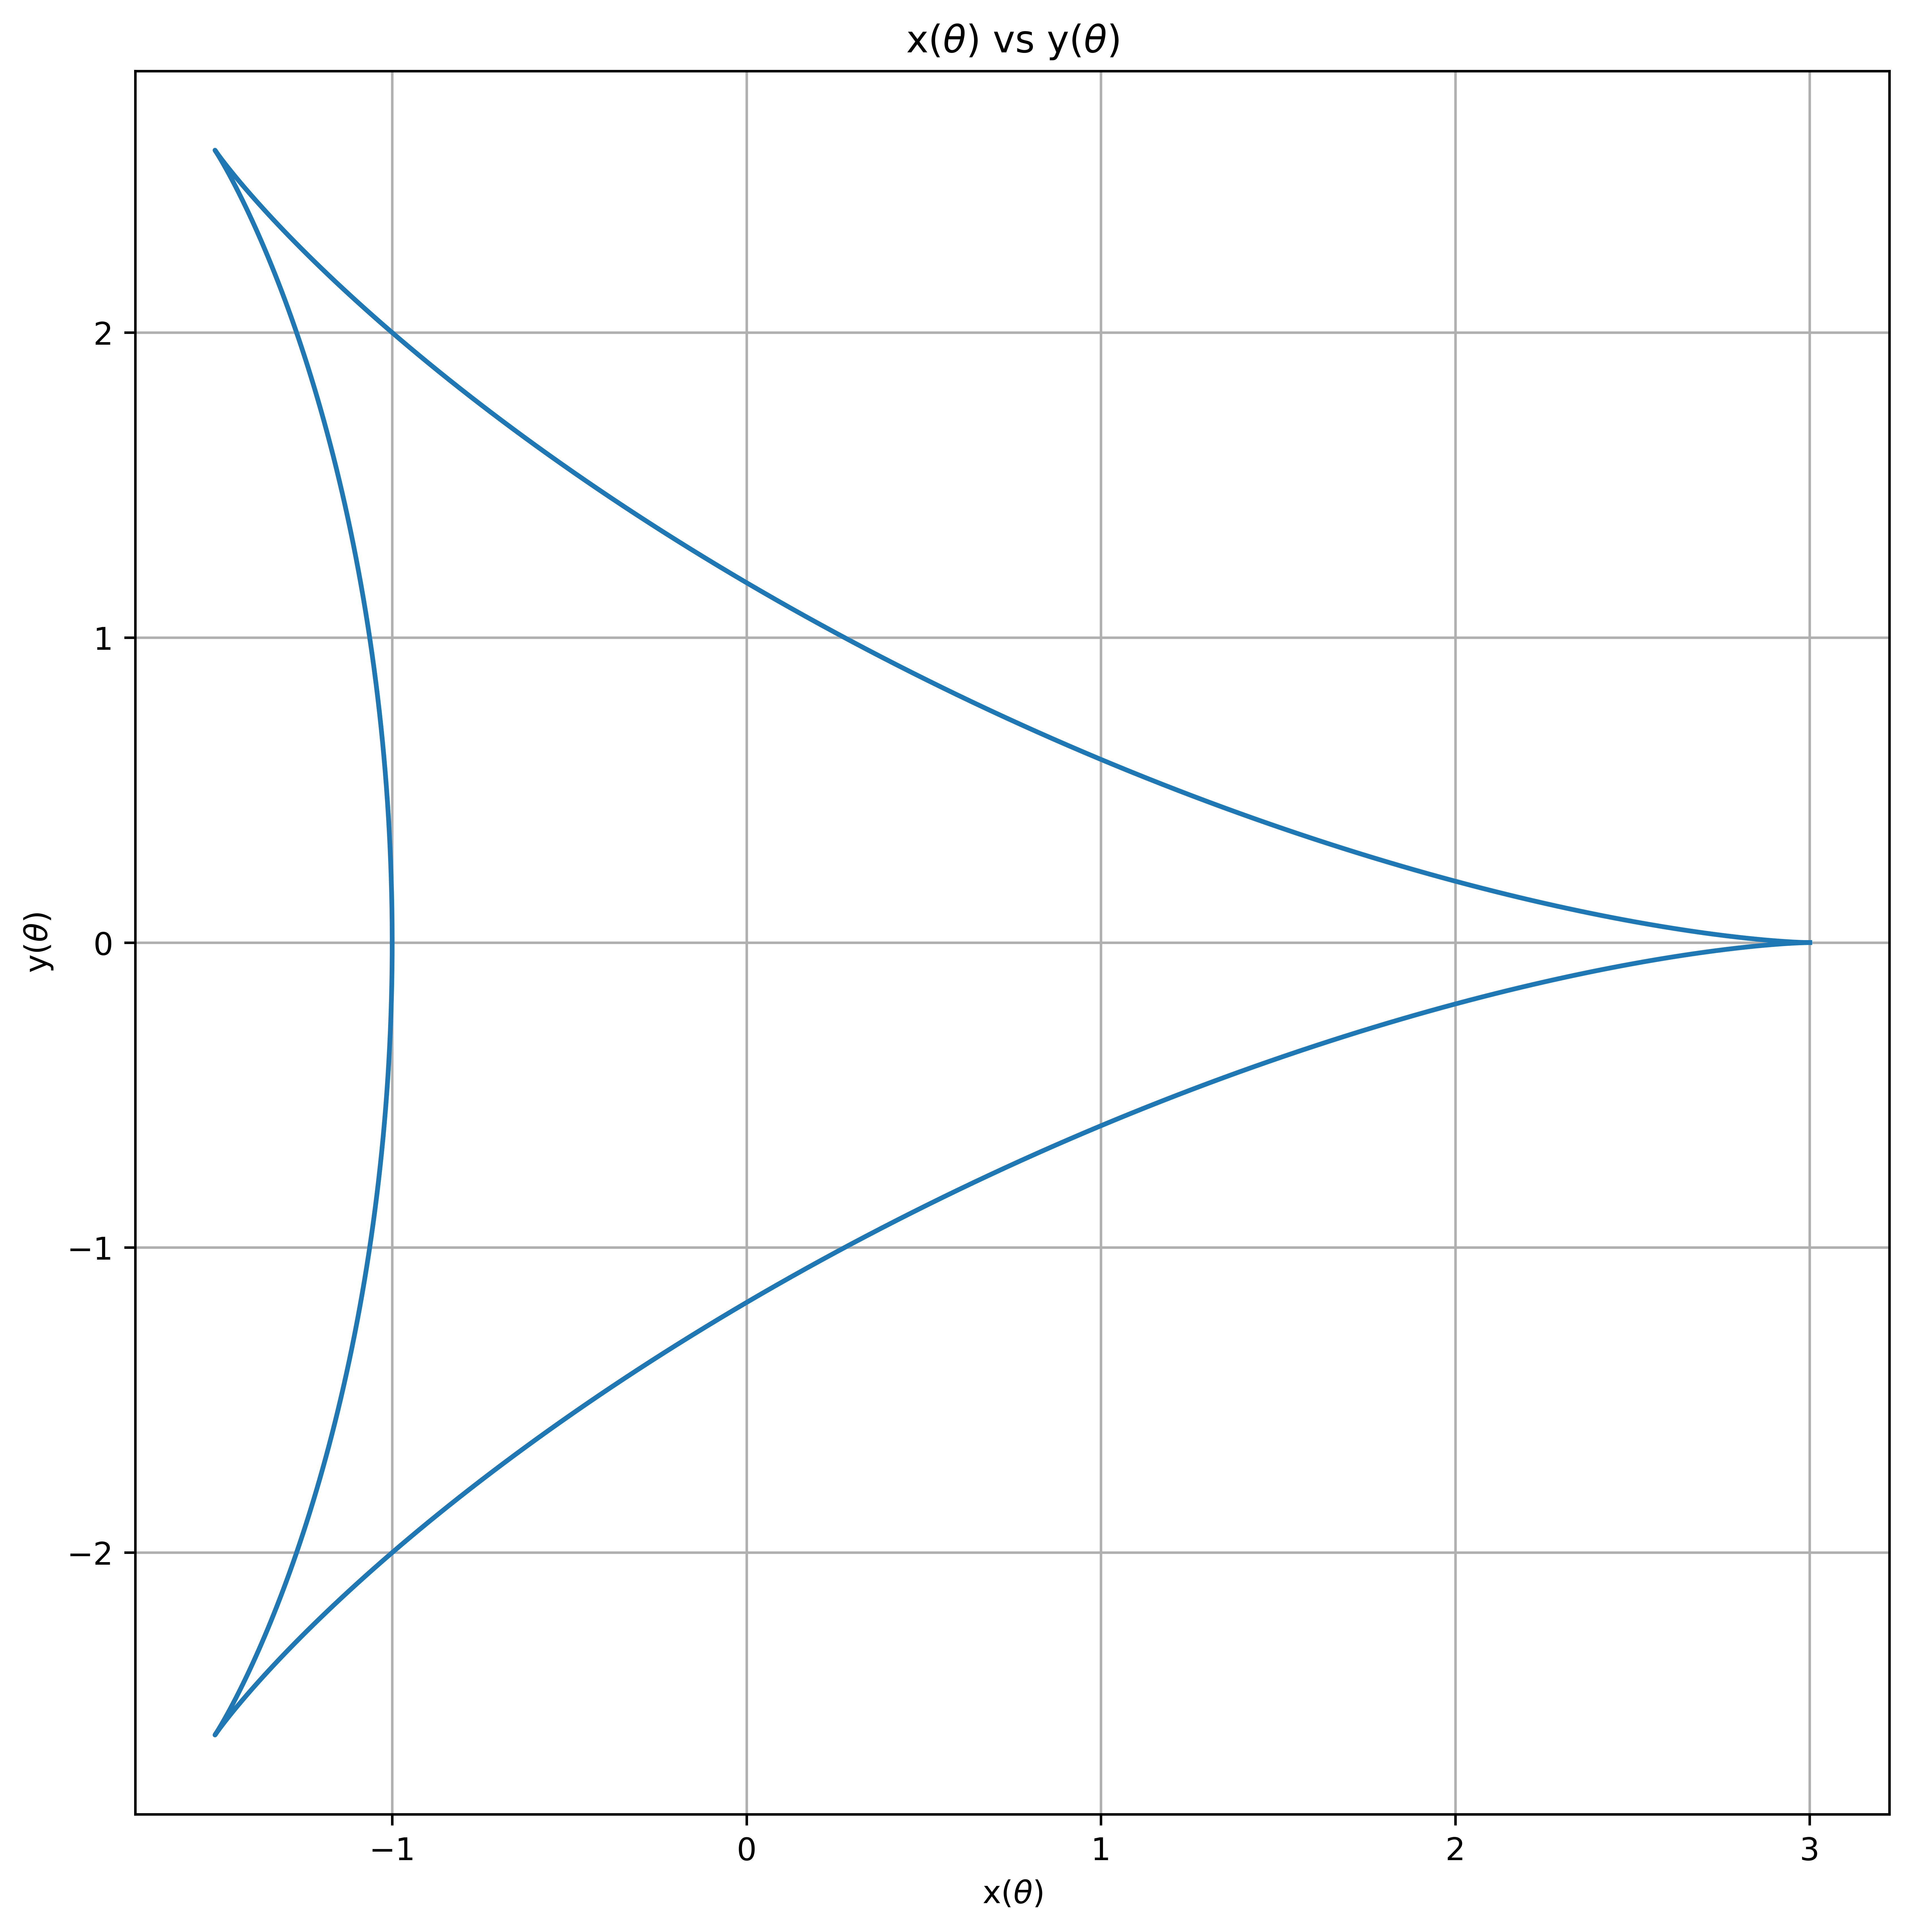

In [40]:
#The easy and lazy way
theta = linspace(0,2*np.pi,1000)
x = 2*np.cos(theta)+np.cos(2*theta)
y = 2*np.sin(theta)-np.sin(2*theta)
figure(figsize=(10, 10), dpi=800)
plt.plot(x,y)
plt.grid(True)
plt.title(r'x($\theta$) vs y($\theta$)')
plt.xlabel(r'x($\theta$)')
plt.ylabel(r'y($\theta$)')
show()


**b)** Usando este mismo enfoque, se puede hacer una gráfica polar $r=f(\theta)$ para alguna función $f$ calculando $r$ para un rango de valores de $\theta$ y luego convirtiendo $r$ y $\theta$ a coordenadas cartesianas usando las ecuaciones estándar:

$$x = r\cos\theta, \; \; \; \; y = r\sin\theta $$

Utiliza este método para trazar la espiral Galileana: $r = \theta^2$ para $0\le\theta\le10\pi$.

In [60]:
#Bueno, lo que vamos a recibir va a ser una función en terminos de theta
#entonces, lo único que vamos a usar sera una r que en si tendriamos que substituir en 
# x = r*cos(theta) y y = r*sin(theta)
def OsoPolar(r,start,finish,puntos,Titulo):
    theta = linspace(start,finish,puntos)
    x = r*cos(theta)
    y = r*sin(theta)
    plot(x,y)
    grid(True)
    title(Titulo)
    xlabel(r'x($\theta$)')
    ylabel(r'y($\theta$)')
    show()

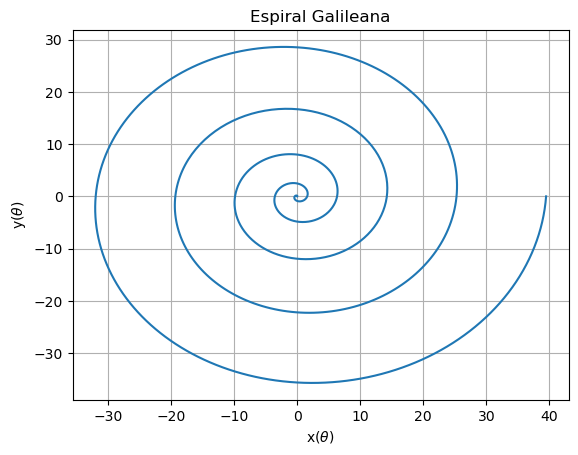

In [61]:
r_b = theta**2
OsoPolar(r_b,0,10*np.pi,1000,'Espiral Galileana')

**c)** Con el mismo método, haz una gráfica polar de la "función de Fey'':

$$r = e^{\cos\theta} - 2 \cos 4\theta + \sin^5 \frac{\theta}{12}$$

en el rango $0\le\theta\le24\pi$.

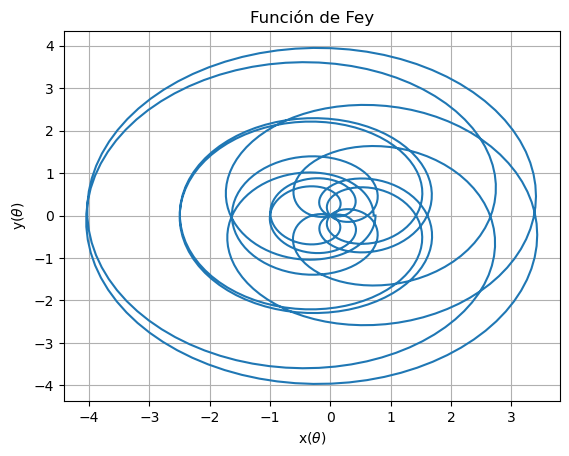

In [62]:
r_c = np.exp(np.cos(theta))-2*np.cos(4*theta)+(np.sin(theta/12))**5
OsoPolar(r_c,0,24*np.pi,1000,'Función de Fey')

### 3. La gráfica de Feigenbaum (caos determinista)

En un especial _halloween_ de los Simpsons, Homero viaja al pasado a la era jurásica y por un pequeño descuido cambia el curso de toda la historia en el futuro. Lo anterior es una referencia al cuento _A Sound of Thunder_ de 1952 del escritor de ciencia ficción Ray Bradbury en donde lo que se destruye en el pasado es una mariposa.

Esta idea fue retomada y popularizada por el físico Edward Lorenz en 1972 cuando dio una conferencia en la Asociación Estadounidense para el Avance de la Ciencia (_American Association for the Advancement of Science_) titulada "¿El aleteo de una mariposa en Brasil puede provocar un tornado en Texas?". Dando paso al concepto del _efecto mariposa_, del cual probablemente hayas oído hablar y que es el ejemplo clásico de _caos determinista_ en sistemas climáticos.

El caos determinista también aparece en muchos sistemas físicos más complejos, incluyendo especialmente la dinámica de fluidos. Debido a su naturaleza aparentemente aleatoria, el comportamiento de los sistemas caóticos es difícil de predecir y se ve fuertemente afectado por pequeñas perturbaciones en las condiciones iniciales. Uno de los ejemplos más famosos del fenómeno del caos determinista es sin duda el _mapeo logístico_, que es un sistema matemático muy simple, definido por la ecuación:

$$x_{n+1} = rx_n(1-x_n)$$
$\;$

Para un valor dado de la constante $r$, se toma un valor de $x_n$ (digamos $\frac{1}{2}$) y se introduce en el lado derecho de esta ecuación y regresa un valor de $x_{n+1}$. Luego se toma ese valor y se vuelve a introducir en el lado derecho, lo que da otro valor, y así sucesivamente. Esto es un _mapeo iterativo_. Se continua haciendo la misma operación una y otra vez sobre su valor de $x_n$, y entonces sucede una de las tres siguiente situaciones: 


1. El valor se establece en un número fijo y permanece allí. Esto se llama _punto fijo_. Por ejemplo, $x_n=0$ es siempre un punto fijo del mapeo logístico. (Si se pone $x_n=0$ en el lado derecho se obtiene $x_{n+1}=0$ en el lado izquierdo).


2. No se establece en un solo valor, sino que se establece en un patrón periódico, rotando alrededor de un conjunto de valores, digamos cuatro valores, repitiéndose en secuencia una y otra vez. Esto se llama **_orbita_ (en este _caso de periodo 4_)** o _ciclo límite_.


3. Todo enloquece. El mapeo, genera una secuencia **{aparentemente aleatoria** de números que parecen no tener ni patrón ni razón (_ni ton ni son_). Esto es el **_caos determinista_**. "Caos" porque realmente parece caótico y "determinista" porque aunque los valores parecen aleatorios, **no lo son**. Son a todas luces, totalmente predecibles, porque se obtienen mediante una simple ecuación y el comportamiento está **determinado**, aunque no lo parezca.

**Responde a las siguientes preguntas:**

**a)** Apoyate en el programa que vimos en clase y escribe un programa que muestre el comportamiento del mapeo logı́stico mediante una gráfica.

In [63]:
def Logistico(r,x):
    return r*x*(1-x)

In [109]:
def Mapeo_Logistico(r, x0, n):
    Logis = [x0] #condición incial x[n]
    for i in range(n): #número de iteraciones
        x_n = r * Logis[i] * (1 - Logis[i]) #nuestro x[n+1]
        Logis.append(x_n)
    return Logis

In [113]:
def plot_logistic_map(r, x0, n):
    x = Mapeo_Logistico(r, x0, n)
    figure(figsize=(10, 10), dpi=800)
    plt.plot(x)
    plt.xlabel('Iteration')
    plt.ylabel('Population Ratio')
    plt.title(f'Logistic Map Iterates (r={r}, $x_0$={x0})')
    plt.show()


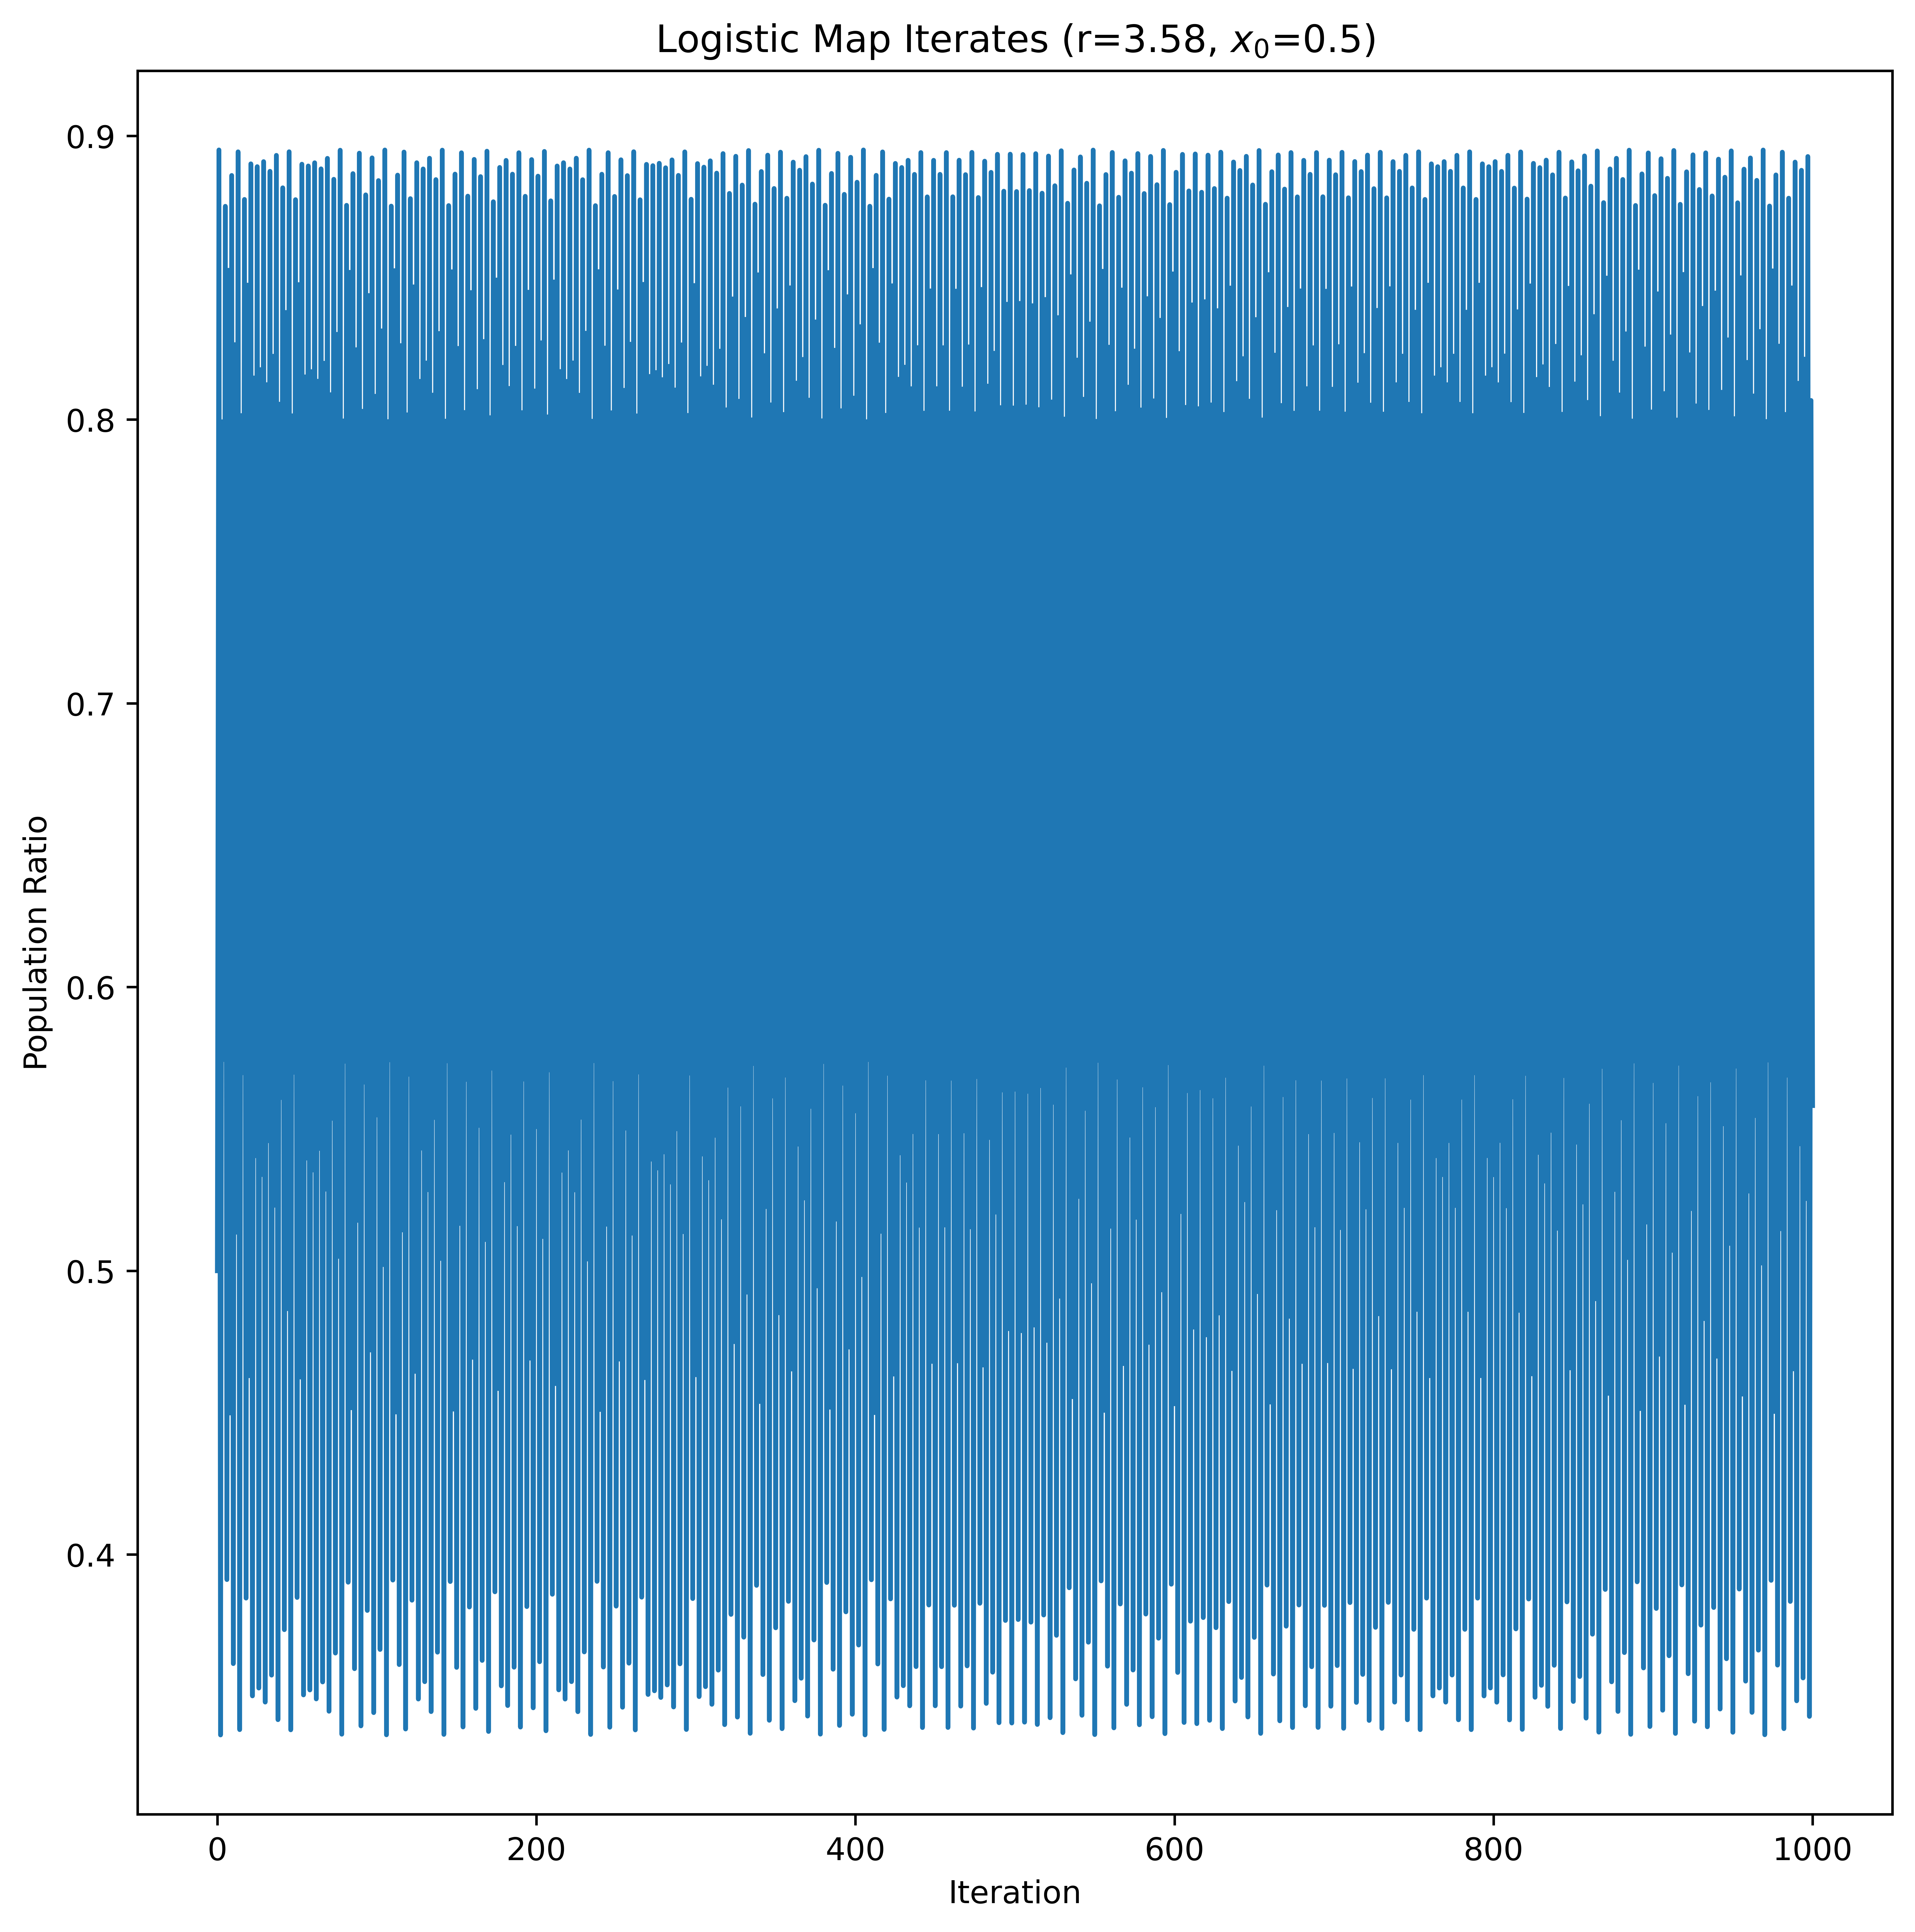

In [124]:
plot_logistic_map(3.58, 0.5, 1000)

**b)** De acuerdo a tu gráfica, ¿a qué valor de $r$ el sistema pasa de un comportamiento ordenado (puntos fijos u orbitas) a un comportamiento caótico? A este punto a veces se le llama "el borde del caos".

**Hint:** Esto es lo que debes hacer para hacer tu programa:

Para un valor dado de $r$, comienza con $x_0=\frac{1}{2}$ e itera la ecuación del mapeo logístico mil veces. Eso le dará la oportunidad de establecerse en un punto fijo o en una orbita de algún periodo. Luego ejecuta otras mil iteraciones y grafica los puntos $(r,x_{\infty})$ en una gráfica donde el eje horizontal es $r$ y el eje vertical es $x_{\infty}$. Puedes usar la función `plot` con las opciones `"ko"` o `"k."` para dibujar una gráfica con puntos, uno para cada punto, o puedes usar la función `scatter` para dibujar un diagrama de dispersión (que siempre usa puntos). Repite todo el cálculo para valores de $r$ de 1 a 4 en pasos de 0.01, graficando los puntos para todos los valores de $r$ en la misma figura. Tu programa debería generar la distintiva gráfica que parece un árbol inclinado hacia un lado. Esta famosa imagen se llama _Gráfica de Feigenbaum_<a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1), en honor a su descubridor Mitchell Feigenbaum.

**c) Opcional (para 1.5 puntos extra):**
Hay otra forma para calcular el diagrama de Feigenbaum, que puede ser más claro y rápido, dado que hace uso de la capacidad de Python para realizar aritmética con arreglos completos.

Crea un arreglo `r` que contenga cada valor distinto de $r$, `[1.0, 1.01, 1.02, ... ]`. Después, crea otro arreglo `x` del mismo tamaño para guardar los valores correspondientes de $x$, establecidos inicialmente en $0.5$; finalmente realiza una iteración del mapeo logístico para todos los valores de $r$ a la vez, con una sola instrucción de la forma `x = r*x*(1-x)` y comparala con tu programa anterior<a name="cite_ref-2"></a>[<sup>[2]</sup>](#cite_note-2).

In [125]:
import matplotlib.pyplot as plt

def logistic_map(r, x0, n):
    """
    Esta función calcula las iteraciones del mapa logístico para un valor dado del parámetro de tasa de crecimiento r, una condición inicial x0 y un número de iteraciones n.
    """
    x = [x0]
    for i in range(n):
        x_n = r * x[i] * (1 - x[i])
        x.append(x_n)
    return x

def plot_logistic_map(r_start, r_end, r_step, x0, n):
    """
    Esta función traza las iteraciones del mapa logístico para un rango de valores del parámetro de tasa de crecimiento r, una condición inicial x0 y un número de iteraciones n.
    """
    rs = []
    xs = []
    for r in range(int(r_start * 100), int(r_end * 100) + 1, int(r_step * 100)):
        r /= 100
        x = logistic_map(r, x0, n)
        rs.extend([r] * len(x))
        xs.extend(x)
    
    plt.scatter(rs, xs, s=1)
    plt.xlabel('Valor de r')
    plt.ylabel('$x_{\infty}$')
    plt.title('Gráfica de Feigenbaum')
    plt.show()


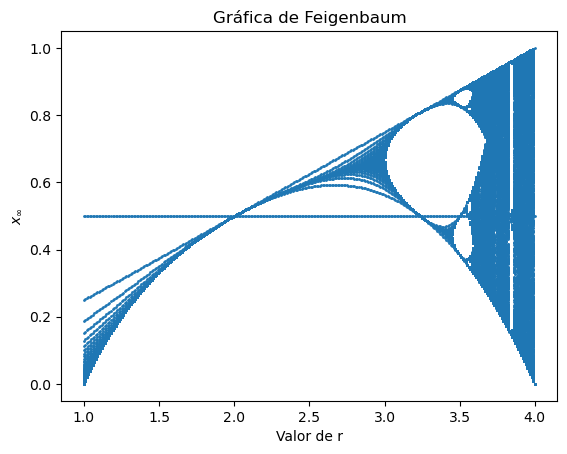

In [126]:
plot_logistic_map(1, 4, 0.01, 0.5, 1000)


In [127]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(r, x):
    """
    Esta función calcula las iteraciones del mapa logístico para un valor dado del parámetro de tasa de crecimiento r y una condición inicial x.
    """
    return r * x * (1 - x)

def plot_logistic_map(r_start, r_end, r_step, x0, n):
    """
    Esta función traza las iteraciones del mapa logístico para un rango de valores del parámetro de tasa de crecimiento r, una condición inicial x0 y un número de iteraciones n.
    """
    rs = np.arange(r_start, r_end + r_step, r_step)
    xs = np.full_like(rs, x0)
    
    for i in range(n):
        xs = logistic_map(rs, xs)
    
    plt.scatter(rs, xs, s=1)
    plt.xlabel('Valor de r')
    plt.ylabel('$x_{\infty}$')
    plt.title('Gráfica de Feigenbaum')
    plt.show()


C:\Users\think\AppData\Local\Temp\ipykernel_3740\619039358.py:8: RuntimeWarning: overflow encountered in multiply
  return r * x * (1 - x)


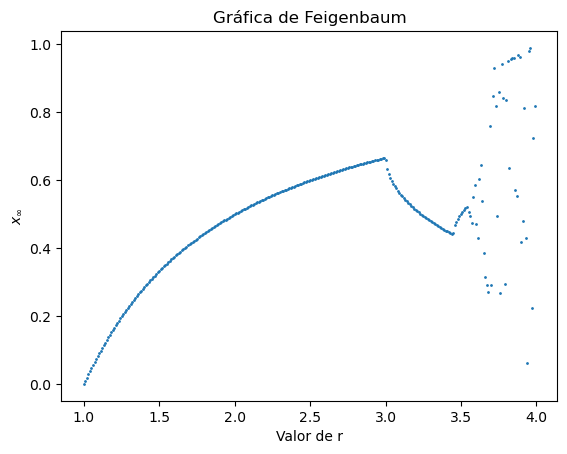

In [128]:
plot_logistic_map(1, 4, 0.01, 0.5, 1000)


<a name="cite_note-1"></a>1. [^](#cite_ref-1) A veces también se suele llamar _gráfica de higuera_, debido al juego de palabras que surge del hecho de que parece un árbol y Feigenbaum significa "higuera" en alemán.

<a name="cite_note-2"></a>2. [^](#cite_ref-2) Debido a la velocidad con la que Python puede realizar cálculos con arreglos, este método debería ser significativamente más rápido que el método más básico anterior.

### 4. El conjunto de Mandelbrot

El conjunto de Mandelbrot, llamado así por su descubridor, el matemático francés Benoit Mandelbrot, es un _fractal_; un objeto matemático infinitamente ramificado que contiene estructura dentro de estructura dentro de estructura, tan profundamente como queramos mirar. La definición del conjunto de Mandelbrot en términos de números complejos es la siguiente.

Consideremos la ecuación:
$$z_{n+1} = z_n^2 + c, \;  \;  \;   \;  \;  \;   \;  \;  \;  z_n, c \in  \mathbb{C}$$
$\;$

donde $z_n$ es un número complejo y $c$ es una constante compleja. De manera, muy similar al _mapeo logístico_, la definición del _conjunto de Mandelbrot_ implica la iteración repetida de esta ecuación para cualquier valor dado de $c$. La ecuación convierte un número de entrada $z_n$ en un número de salida $z_{n+1}$; de tal manera que se toma un valor inicial de $z_0$ y se introduce en la ecuación para obtener un nuevo valor $z_1$, luego tomamos ese valor y lo volvemos a introducir para obtener $z_2$ y así sucesivamente.

Así, el conjunto de Mandelbrot es el conjunto de puntos del plano complejo que satisface la siguiente definición:

_Para un valor dado de $c$ y la condición inicial $z_0=0$; si al iterar repetidamente la ecuación, la magnitud del valor resultante es mayor a dos (i.e. $z_{\infty} > 2$), entonces el punto del plano complejo para ese valor $c$ no está en el conjunto de Mandelbrot; de lo contrario, si está en el conjunto._



Para utilizar esta definición, en principio, habría que iterar infinitas veces para demostrar que un punto está en el conjunto de Mandelbrot, ya que un punto está en el conjunto sólo si la iteración nunca pasa de $z_n=2$. Sin embargo, en la práctica, simplemente se realiza una gran cantidad de iteraciones (digamos 100) y si $z_n$ no ha excedido 2 en ese momento, entonces lo consideramos suficientemente bueno.

**a)** Escribe un programa para crear una imagen del conjunto de Mandelbrot.
Realiza la iteración para todos los valores de $c=x+iy$ en una cuadrícula de $N \times N$ que abarque la región donde $-2\le x\le 2$ y $-2\le y\le 2$. Haz una gráfica de densidad (`density plot`) en el que los puntos de la cuadrícula dentro del conjunto de Mandelbrot estén coloreados en negro y los de afuera estén coloreados en blanco.

**_Sugerencia_**: Probablemente te resulte útil comenzar con una cuadrícula muy simple, es decir, con un valor pequeño de $N$ (quizás $N=100$) para que tu programa se ejecute rápidamente mientras lo pruebas. Una vez que te asegures de que funciona correctamente, aumenta el valor de $N$ para producir una imagen final de alta calidad de la forma del conjunto.

#### b) Opcional (para 1.5 puntos extra):
Si te aburrió lo anterior (o te resultó demasiado fácil), puedes programar otra variante del mismo ejercicio que puede producir imágenes sorprendentes. En lugar de colorear los puntos solo en blanco o negro, colorea los puntos de acuerdo con el número de iteraciones de la ecuación antes de que $z_n$ sea mayor que 2 (o bien el número máximo de iteraciones si es que $z_n$ nunca llega a ser mayor que 2). Si usas alguno de los esquemas más coloridos que Python proporciona para las gráficas de densidad, como `"hot"` o `"jet"`, puedes crear algunas imágenes muy espectaculares. Otra variante interesante es colorear según el logaritmo del número de iteraciones, lo que ayuda a revelar parte de la estructura más fina fuera del conjunto.

### 5. Factorial (valores flotantes)
 
Durante el curso, hemos escrito un par de programas para calcular e imprimir el factorial de un número ingresado por el usuario, usando valores _enteros_ y no de _punto flotante_.  Usa alguno de esos programas para calcular el factorial de 200 y modificalo para **usar variables de _punto flotante_** y calcula nuevamente el factorial de 200.

**Qué es lo que encuentras?, explica.**


### 6. Ecuaciones cuadráticas

Considera una ecuación cuadrática $ax^2+bx+c=0$ que tiene soluciones reales.

**a)** Escribe un programa que tome como entrada tres números, $a$, $b$ y $c$, e imprima las dos soluciones de la ecuación cuadrática $ax^2+bx+c=0$; usando la fórmula estándar:

$$x_{1,2} = {-b \pm \sqrt{b^2-4ac}\over2a}$$
$\;$

Utiliza tu programa para calcular las soluciones de $0.001 x^2 + 1000 x + 0.001 = 0$.



**b)** Existe otra forma de escribir las soluciones de una ecuación cuadrática.  Demuestra que multiplicando la parte superior e inferior de la solución anterior por $-b\pm \sqrt{b^2-4ac}$, las soluciones también se pueden escribir como:

$$x_{1,2} = {2c\over-b\pm \sqrt{b^2-4ac}}$$
$\;$

Agrega unas lineas a tu programa para imprimir también estos valores, además de los anteriores y entonces usa nuevamente el programa para resolver $\; 0.001 x^2 + 1000 x + 0.001= 0$.
**¿Qué es lo que ves? ¿Cómo lo explicas?**.

**c)** Usando lo que has aprendido, escribe un nuevo programa que calcule con precisión ambas raíces de la ecuación cuadrática en todos los casos.

Este es un buen ejemplo de cómo las computadoras no siempre funcionan como se espera. Si simplemente se aplica la fórmula estándar para la ecuación cuadrática, la computadora a veces obtendrá una respuesta incorrecta. En la práctica, el método que has desarrollado aquí es la forma correcta de resolver una ecuación cuadrática en una computadora, aunque es más complicado que la fórmula estándar. Si estuvieras escribiendo un programa que implicara resolver muchas ecuaciones cuadráticas, este método pod ría ser un buen candidato para convertirlo en una función: podrías poner los detalles del método dentro de dicha función para ahorrarte la molestia de seguirlo paso a paso, cada vez que tengas una nueva ecuación que resolver.



### 7. Cálculo de derivadas

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x_0$. Esto lo podemos hacer con lápiz y papel si conocemos la forma matemática de la función, o podemos hacerlo en la computadora haciendo uso de la definición de la derivada:

$${df \over dx} = \lim_{\delta x \to 0} {f(x_0+\delta)-f(x_0)\over \delta x}$$
$\;$

En la computadora no podemos tomar el límite cuando $\delta x$ llega a cero, pero podemos obtener una aproximación razonable simplemente haciendo que $\delta x $ sea pequeño.

**a)** Escribe un programa que defina una función `f(x)` y que devuelva el valor $x(x-1)$, luego calcula la derivada de la función en el punto $x_0=1$ usando la fórmula anterior con  $\delta x =10^{-2}$. Calcula analíticamente el valor real de la misma derivada y compáralo con la respuesta que da tu programa. Ambos no estarán perfectamente de acuerdo.

**¿Por qué no?**


**b)** Repite el cálculo para $\delta x =10^{-4}$, $10^{-6}$, $10^{-8}$, $10^{-10}$, $10^{-12}$ y $10^{-14}$. Deberías ver que la precisión del cálculo inicialmente mejora a medida que $\delta x $ se hace más pequeña, pero luego vuelve a empeorar.

**¿Por qué pasa esto?**



Estudiaremos las derivadas numéricas con más detalle más adelante en el curso, donde examinaremos¸ técnicas para abordar estos problemas y maximizar la precisión de nuestros cálculos.